# Marketing Budget Optimization

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import math


import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [2]:
df_advertising = pd.read_csv("advertising.csv")

In [3]:
df_advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Linear Regression Assumption 1

There should be a linear relationship between target and features. We can use scatterplot to visualize and validate for us.

/Users/georgewongsinhong/opt/anaconda3/envs/activities/lib/python3.8/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


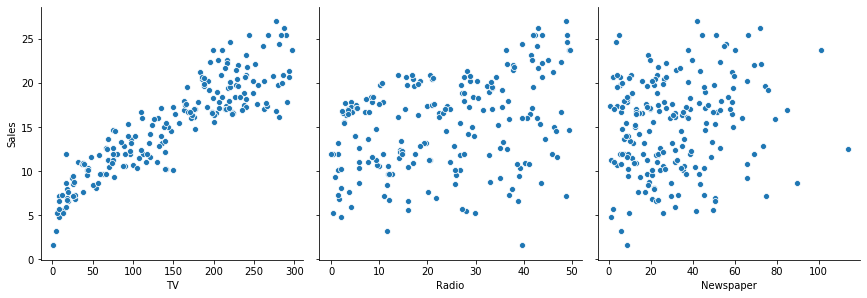

In [10]:
sns.pairplot(df_advertising, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size = 4, aspect = 1)


### Linear Regression Assumption 2

Little or no multicollinearity between features

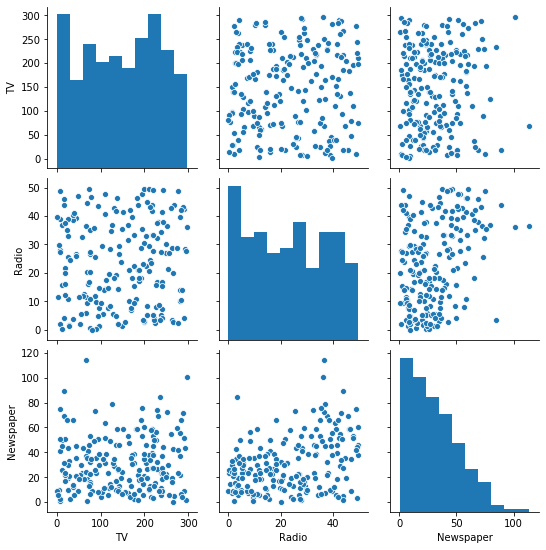

In [11]:
sns.pairplot(df_advertising[['TV','Radio','Newspaper']])

### Linear Regression Assumption 3

#### Homoscedasticity

OLS assumes all residuals drawn from population has constant variance


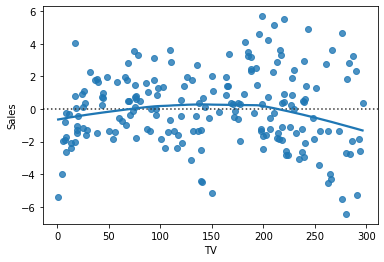

In [15]:
sns.residplot(x = df_advertising['TV'], y = df_advertising["Sales"], lowess = Truehti

## Creating Multiple Linear Regression model
As we're dealing with multiple variable, it would be ideal to introduce MLR:

\begin{equation}
𝑦=𝑎0+𝑎1𝑥1+𝑎2𝑥2+...+𝑎𝑛𝑥𝑛 
\end{equation}

#### Assesing using Statsmodel

In [16]:
# create a fitted model with all three features
Ststsmodels_model = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=df_advertising)
Ststsmodels_result = Ststsmodels_model.fit()

# print the coefficients
Ststsmodels_result.params

Intercept    4.625124
TV           0.054446
Radio        0.107001
Newspaper    0.000336
dtype: float64

In [18]:
# print a summary of the fitted model
Ststsmodels_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Wed, 25 Mar 2020   Prob (F-statistic):           8.13e-99
Time:                        13:44:26   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Sk-learn linear

In [17]:
### SCIKIT-LEARN ###

feature_cols = ['TV', 'Radio', 'Newspaper']
X = df_advertising[feature_cols]
y = df_advertising[["Sales"]]

# instantiate and fit
SkLearn_model = LinearRegression()
SkLearn_result = SkLearn_model.fit(X, y)

# print the coefficients
print(SkLearn_result.intercept_)
print(SkLearn_result.coef_)

[4.62512408]
[[0.05444578 0.10700123 0.00033566]]


In [19]:
# include Newspaper
X = df_advertising[['TV', 'Radio', 'Newspaper']]
y = df_advertising.Sales

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


1.5096109295725835


In [22]:
print(metrics.r2_score(y_test,y_pred))

0.9048917241361681


In [94]:
coefficient = lm2.coef_

In [97]:
coefficient

array([0.05483762, 0.10218027, 0.00078783])

In [98]:
inter = lm2.intercept_

In [100]:
inter

4.633808551125243

Linear regression:

$ y = 0.0548x1 + 0.1022x2 + 0.0007878x3 + 4.6338 $

Objective function is :

$ Maximize, y = 0.0548𝑥1+0.1022𝑥2+0.0007878𝑥3+4.6338 $

Constraints:

$ x1 + x2 + x3 < 10000 $

## Using PuLP to find the optimum value 

PuLP is a linear programming optimization package. 

In [53]:
from pulp import *

We plan to maximize the value we wanted to get from P

In [81]:
prob = LpProblem("Ads Sales Problem", LpMaximize)

Specifying the constraints below where:
* x - tv
* y - radio 
* z - newpaper

In [82]:
x = LpVariable("x", 0, 200)
y = LpVariable("y", 0, 500)
z = LpVariable("z", 0, 500)

Our budget should be less than 1000

In [83]:
prob += x + y + z <= 1000

Our objective function: 


In [84]:
prob += 0.0548*x + 0.1022*y + 0.0007878*y + 4.6338

In [85]:
status = prob.solve()


In [86]:
LpStatus[status]

'Optimal'

In [87]:
print(prob)

Ads_Sales_Problem:
MAXIMIZE
0.0548*x + 0.1029878*y + 4.6338
SUBJECT TO
_C1: x + y + z <= 1000

VARIABLES
x <= 200 Continuous
y <= 500 Continuous
z <= 500 Continuous



## Our optimum value required to maximize P

In [88]:
for v in prob.variables():
    print(v.name, "=", v.varValue)

x = 200.0
y = 500.0
z = 0.0


To confirm its value

In [101]:
calculation = 0.0548*200 + 0.1022*500 + 0.0007878*0 + 4.6338

In [102]:
calculation

66.6938

In [91]:
df_advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000
